In [1]:
%load_ext autoreload



%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import time

In [2]:
from frm_dataset_loader import load_dataset
from conf_dataset_1 import *


['ook', 'ask4', 'ask8', 'bpsk', 'qpsk', 'psk8', 'psk16', 'psk32', 'apsk16', 'apsk32', 'apsk64', 'qam16', 'qam32', 'qam64', 'gmsk', 'cpfsk']


In [3]:
fname = 'datasets/test_1.dat'

(comb_test,carrier_test,clean_test,fading_test,raw_test,
         freq_test,timing_offNum_test,timing_step_test,
         coeff_test,mod_test,snr_test) = load_dataset(fname,max_sps,len(mod_list))

In [4]:
from frm_demod_utils import genie_demod_batch

In [5]:
mod_name_test = list(map( lambda x : mod_list[x],np.argmax(mod_test,-1)))

In [6]:
slc_test = slice(None,None)


In [7]:
t1= time.time()
test_ser_genie = genie_demod_batch(comb_test[slc_test],freq_test[slc_test]/(2*np.pi),timing_step_test[slc_test],
                             timing_offNum_test[slc_test],mod_name_test[slc_test], coeff_test[slc_test],snr_test[slc_test]
                             ,raw_test[slc_test])
print(time.time()-t1)

543.8528594970703


In [8]:
from frm_eval_utils import ecdf

In [9]:
srt_genie,prob_genie = ecdf(test_ser_genie[np.logical_not(np.isnan(test_ser_genie))])

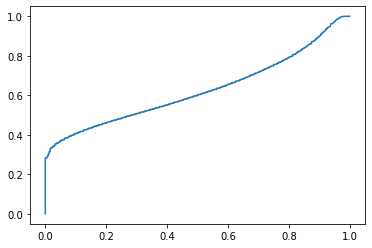

In [10]:
plt.plot(srt_genie,prob_genie)

In [11]:
import datetime

outputs = {}
outputs['dataset_params'] = [pkt_size,max_sps,mod_list,sps_rng,pulse_ebw_list,timing_offset_rng,fading_spread_rng,freq_err_rng,phase_err_rng,snr_rng]
outputs['date'] =  f'{datetime.datetime.now():%Y-%m-%d %H:%M:%S%z}'
outputs['genie'] = test_ser_genie

In [12]:
FNAME = '003'

In [13]:
import pickle
with open(f'outputs/{FNAME}.pkl','wb') as f:
    pickle.dump(outputs,f)